In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import os
import seaborn as sns

plt.rcParams["axes.grid"] = False
plt.style.use('dark_background')

In [3]:
df = pd.read_csv('train1.csv')
df.head()

,filename,opacity,diabetic retinopathy,glaucoma,macular edema,macular degeneration,retinal vascular occlusion,normal,new
0,c24a1b14d253.jpg,0,0,0,0,0,1,0,retinal vascular occlusion
1,9ee905a41651.jpg,0,0,0,0,0,1,0,retinal vascular occlusion
2,3f58d128caf6.jpg,0,0,1,0,0,0,0,glaucoma
3,4ce6599e7b20.jpg,1,0,0,0,1,0,0,"opacity, macular degeneration"
4,0def470360e4.jpg,1,0,0,0,1,0,0,"opacity, macular degeneration"


### Show random images

In [95]:
images = df['filename'].values

In [96]:
rand_im = [np.random.choice(images) for i in range(9)]

In [97]:
img_dir = r"D:\data\Projects\notebooks\RetinaAI\train"

In [98]:
rand_im

['e91835ff6c2a.jpg',
 'ff812ca8d745.jpg',
 'c0c89c25854f.jpg',
 '528263b9f5ea.jpg',
 '3af1eab42737.jpg',
 'fc5f80e39091.jpg',
 'e0049e253dfc.jpg',
 'd25e550efe5c.jpg',
 '04faa34ea9b8.jpg']

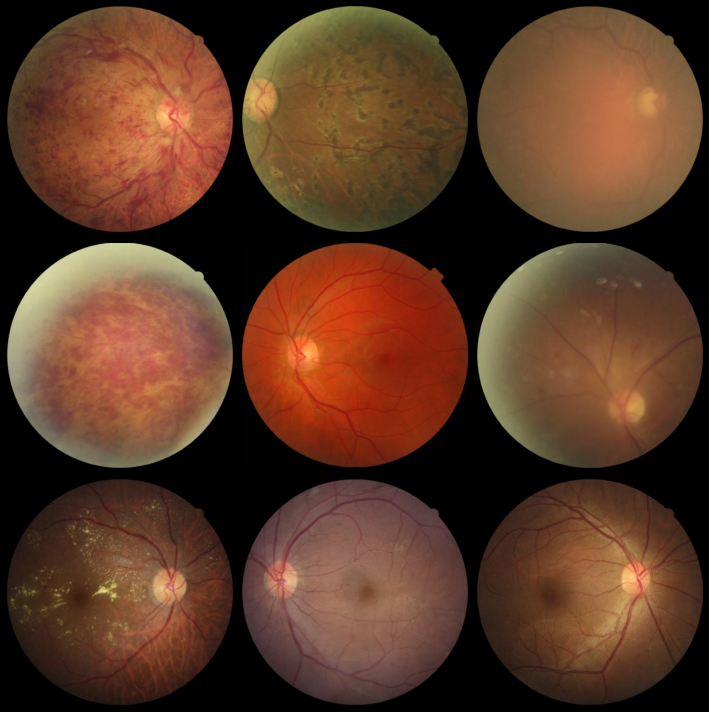

In [99]:
plt.figure(figsize=(10,10))
for i in range(9):
    plt.subplot(3,3,i+1)
    img = plt.imread(os.path.join(img_dir, rand_im[i]))
    plt.imshow(img)
    plt.axis('off')
plt.tight_layout()

### Pixel Intensity
Pixel intensity is the primary information stored within a pixel. This means, that it could be an important feature for a classification. 

The dimensions of the image are 512 pixels width and 512 pixels height
The maximum pixel value is 239.0000 and the minimum is 0.0000
The mean value of the pixels is 73.6532 and the standard deviation is 45.7724


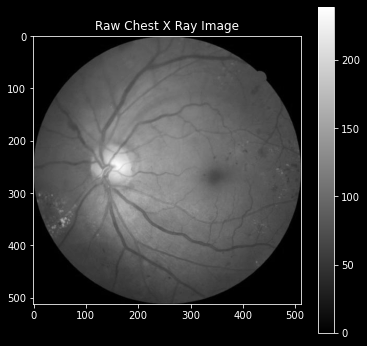

In [100]:
img_gray = r'D:\data\Projects\notebooks\RetinaAI\train_gray'

plt.figure(figsize=(6, 6))
sample_img = "00a1cd744652.jpg"
#df.filename[0]
raw_image = plt.imread(os.path.join(img_gray, sample_img))
plt.imshow(raw_image, cmap='gray') #cmap, weil plot sonst farben erfindet für values
plt.colorbar()
plt.title('Raw Chest X Ray Image')
print(f"The dimensions of the image are {raw_image.shape[0]} pixels width and {raw_image.shape[1]} pixels height")
print(f"The maximum pixel value is {raw_image.max():.4f} and the minimum is {raw_image.min():.4f}")
print(f"The mean value of the pixels is {raw_image.mean():.4f} and the standard deviation is {raw_image.std():.4f}")

In [101]:
from skimage import io

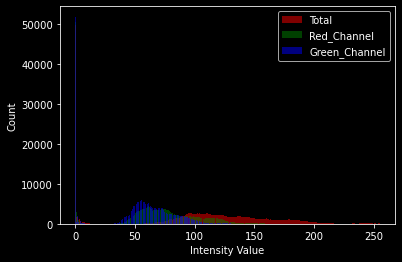

In [102]:
# https://towardsdatascience.com/histograms-in-image-processing-with-skimage-python-be5938962935
image = io.imread(r"D:\data\Projects\notebooks\RetinaAI\train\00a1cd744652.jpg")

#_ = plt.hist(image.ravel(), bins = 256, color = 'orange', )
_ = plt.hist(image[:, :, 0].ravel(), bins = 256, color = 'red', alpha = 0.5)
_ = plt.hist(image[:, :, 1].ravel(), bins = 256, color = 'Green', alpha = 0.5)
_ = plt.hist(image[:, :, 2].ravel(), bins = 256, color = 'Blue', alpha = 0.5)
_ = plt.xlabel('Intensity Value')
_ = plt.ylabel('Count')
_ = plt.legend(['Total', 'Red_Channel', 'Green_Channel', 'Blue_Channel'])
plt.show()

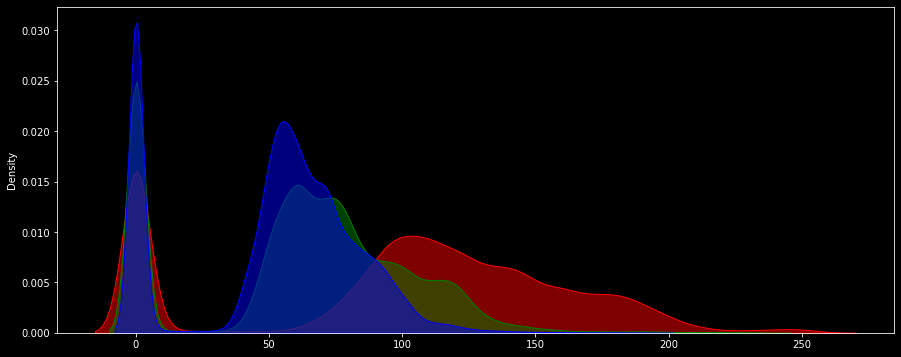

In [103]:
plt.figure(figsize=(15, 6))
sns.kdeplot(image[:, :, 0].ravel(), color = 'red', shade = True, alpha = 0.5);
sns.kdeplot(image[:, :, 1].ravel(), color = 'green', shade = True, alpha = 0.5);
sns.kdeplot(image[:, :, 2].ravel(), color = 'blue', shade = True, alpha = 0.5);

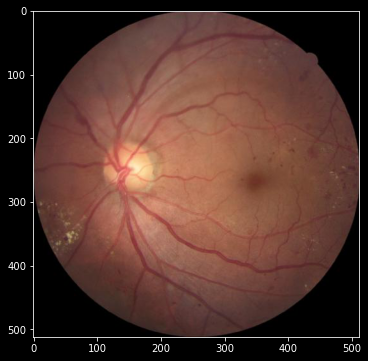

In [104]:
# zeig noch das bild dazu
plt.figure(figsize=(6,6))
plt.imshow(image)
plt.show()

### Funktion, um Krankheiten anzuzeigen

In [105]:
df.columns

Index(['filename', 'opacity', 'diabetic retinopathy', 'glaucoma',
       'macular edema', 'macular degeneration', 'retinal vascular occlusion',
       'normal', 'new'],
      dtype='object')

In [13]:
def imag(tar):
    im_dir = r"D:\data\Projects\notebooks\RetinaAI\train_crop&res"
    df_tar = df[df.new == tar]
    plt.figure(figsize=(10, 10))
    
    for i in range(9):
        plt.subplot(3,3,i+1)
        rand = df_tar.sample(n=1).iloc[0,0]
        img = plt.imread(os.path.join(im_dir, rand))
        plt.axis('off')
        plt.title(rand)
        plt.imshow(img) #, cmap='gray'
    print('Abnormality:'+tar.upper())
    plt.tight_layout()

Abnormality:RETINAL VASCULAR OCCLUSION


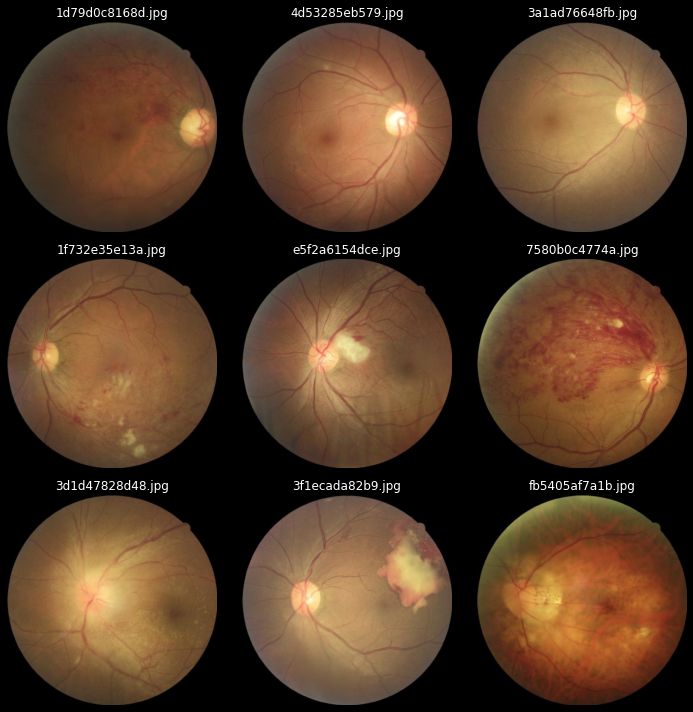

In [14]:
imag('retinal vascular occlusion')

In [199]:
df[df.filename == 'a86ef8cf716b.jpg']

,filename,opacity,diabetic retinopathy,glaucoma,macular edema,macular degeneration,retinal vascular occlusion,normal,new
1679,a86ef8cf716b.jpg,1,0,0,0,0,0,0,opacity


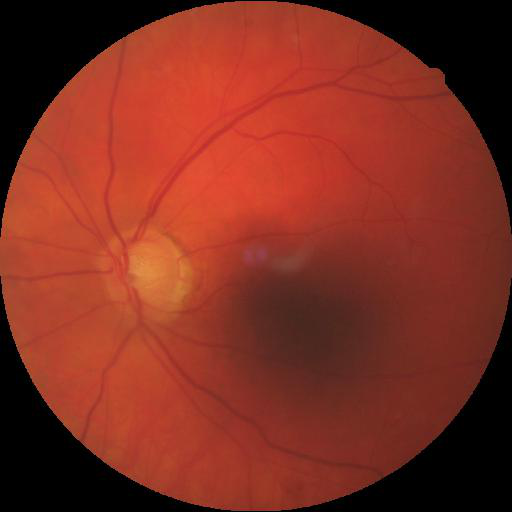

In [198]:
Image.open(r'D:\data\Projects\notebooks\RetinaAI\train\\a86ef8cf716b.jpg')

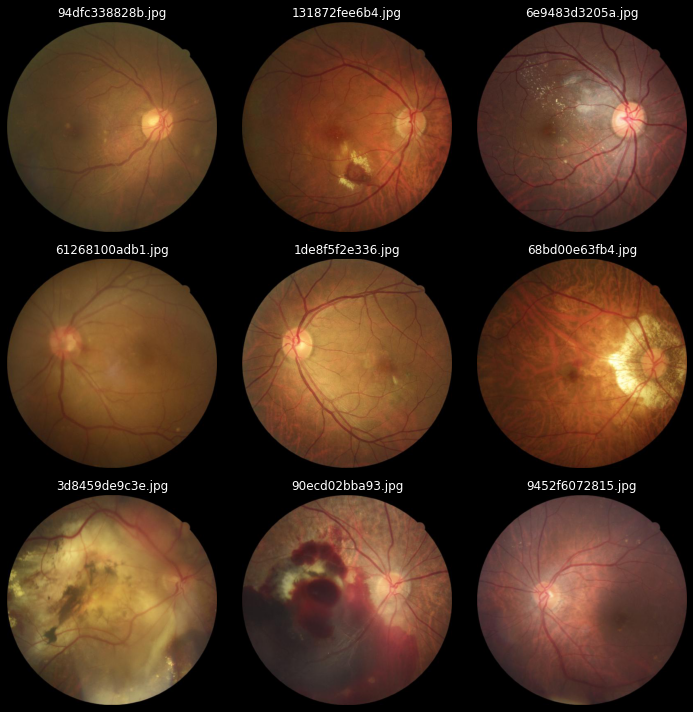

In [196]:
imag('macular degeneration')

In [163]:
def get_image(target):
    im_dir = r"D:\data\Projects\notebooks\RetinaAI\train_gray"
    df_tar = df[df.new == target]
    rand = df_tar.sample(n=1).iloc[0,0]
    plt.figure(figsize=(6,6))
    img = plt.imread(os.path.join(im_dir, rand))
    print(rand)
    return plt.imshow(img)

7ca7f44b6ca8.jpg
8876049f1e2b.jpg
155452d743da.jpg


(<matplotlib.image.AxesImage at 0x2ae153d2430>,
 <matplotlib.image.AxesImage at 0x2ae1541f310>)

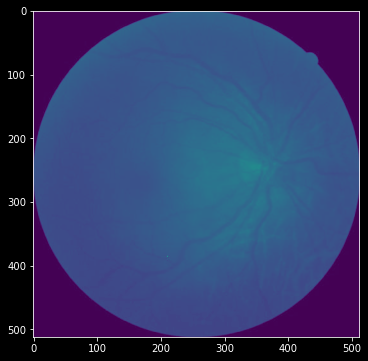

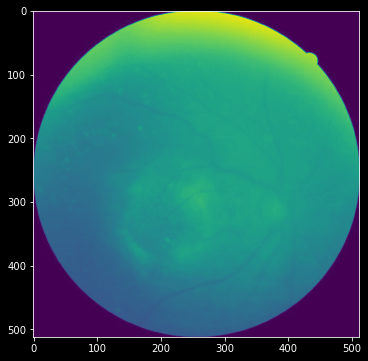

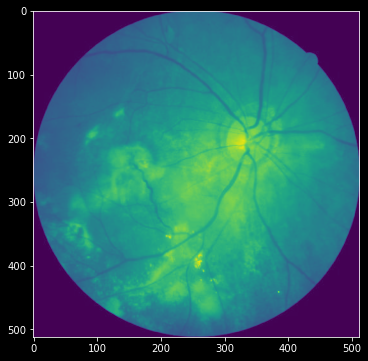

In [177]:
get_image('opacity'),  get_image('opacity, macular degeneration'),  get_image('macular degeneration')

### Version 1: Grayscale Conversion with Pillow

In [109]:
from PIL import Image

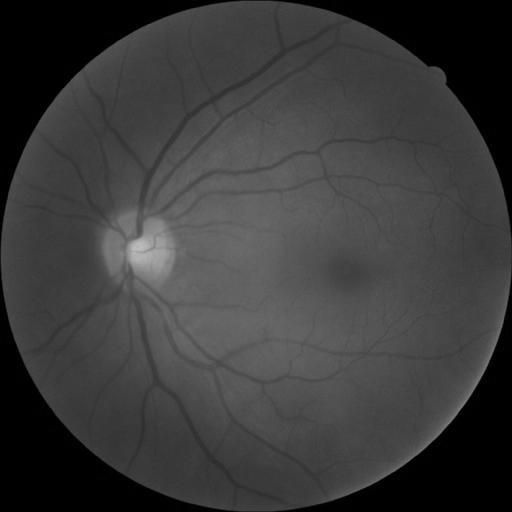

In [159]:
Image.open(r'D:\data\Projects\notebooks\RetinaAI\train_gray\\e9967004dd07.jpg')

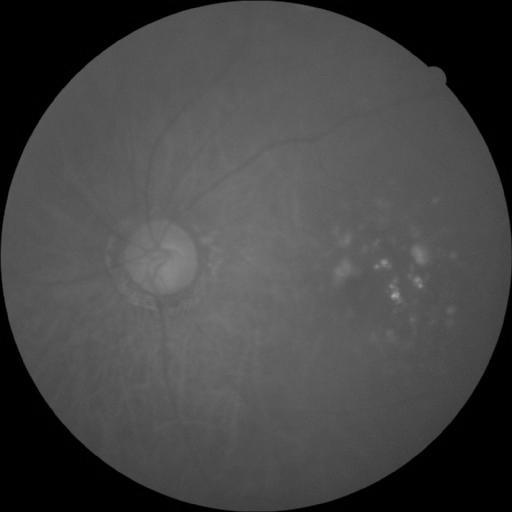

In [160]:
Image.open(r'D:\data\Projects\notebooks\RetinaAI\train_gray\\a0a088a0c45e.jpg')

In [111]:
col = r"D:\data\Projects\notebooks\RetinaAI\train"
gray = r"D:\data\Projects\notebooks\RetinaAI\train_gray"

In [112]:
col_image = plt.imread(os.path.join(gray, "00a1cd744652.jpg"))
grey_image = plt.imread(os.path.join(gray, "00a1cd744652.jpg"))
grey_image.max(), col_image.max(), grey_image.mean(), col_image.mean()
grey_image.min(), grey_image.max()

(0, 239)

In [113]:
new = plt.imread(os.path.join(gray, "00a1cd744652.jpg"))
new.max()
new

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]], dtype=uint8)

### Verschiedene Color Channels anzeigen

In [114]:
import cv2

In [115]:
path = r'D:\data\Projects\notebooks\RetinaAI\train\00a1cd744652.jpg'

In [116]:
image = cv2.imread(path)
window_name = 'image'
cv2.imshow(window_name, image)
cv2.waitKey(0)
cv2.destroyAllWindows()

In [117]:
img = cv2.imread(path)

# Blue
img[:,:,0] = 0 # Blue
#img[:,:,1] = 0 # Green
img[:,:,2] = 0 # Red

cv2.imshow('red_img', img)
cv2.waitKey()

-1

### Bild als HSV anzeigen - kann für Segmentation genutzt werden
https://scikit-image.org/docs/dev/auto_examples/color_exposure/plot_rgb_to_hsv.html

In [118]:
from skimage import io
from skimage import data
from skimage.color import rgb2hsv

In [119]:
rgb_img = io.imread(r'D:\data\Projects\notebooks\RetinaAI\train\00a1cd744652.jpg')

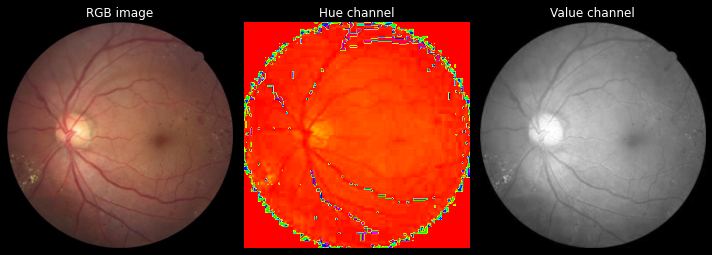

In [120]:
hsv_img = rgb2hsv(rgb_img)
hue_img = hsv_img[:, :, 0]
value_img = hsv_img[:, :, 2]

fig, (ax0, ax1, ax2) = plt.subplots(ncols=3, figsize=(10, 8))

ax0.imshow(rgb_img)
ax0.set_title("RGB image")
ax0.axis('off')
ax1.imshow(hue_img, cmap='hsv')
ax1.set_title("Hue channel")
ax1.axis('off')
ax2.imshow(value_img, cmap='gray')
ax2.set_title("Value channel")
ax2.axis('off')

fig.tight_layout()

### Find Images with more black and crop them

Versuch 1

In [121]:
img = cv2.imread(r'D:\data\Projects\notebooks\RetinaAI\0c0fb8b96715.jpg')

In [122]:
# converting to gray
gray = cv2.cvtColor(img,cv2.COLOR_BGR2GRAY)

In [123]:
_,thresh = cv2.threshold(gray,1,255,cv2.THRESH_BINARY)

In [124]:
contours,hierarchy = cv2.findContours(thresh,cv2.RETR_EXTERNAL,cv2.CHAIN_APPROX_SIMPLE)
cnt = contours[0]
x,y,w,h = cv2.boundingRect(cnt)

In [125]:
crop = img[y:y+h,x:x+w]
cv2.imwrite('neuneu.jpg',crop)

True

hat nicht funktioniert

Versuch 2 
- https://github.com/imneonizer/Find-and-crop-objects-From-images-using-OpenCV-and-Python
- https://github.com/facebookresearch/maskrcnn-benchmark/issues/339

In [126]:
#reading image
image = cv2.imread(r'D:\data\Projects\notebooks\RetinaAI\0c0fb8b96715.jpg')

#converting to gray scale
gray = cv2.cvtColor(image,cv2.COLOR_BGR2GRAY)

In [127]:
edged = cv2.Canny(image, 10, 250)
ext = cv2.RETR_EXTERNAL
chain = cv2.CHAIN_APPROX_SIMPLE

In [128]:
contours, hierarchy = cv2.findContours(edged.copy(),ext, chain)

In [129]:
idx = 0
for c in contours:
	x,y,w,h = cv2.boundingRect(c)
	if w>50 and h>50:
		idx+=1
		new_img=image[y:y+h,x:x+w]
		#cropping images
		cv2.imwrite("cropped/"+str(idx) + '.png', new_img)
cv2.imshow("Original Image",image)
cv2.imshow("Canny Edge",edged)
cv2.waitKey(0)
print('>> Objects Cropped Successfully!')
print(">> Check out 'cropped' Directory")

>> Objects Cropped Successfully!
>> Check out 'cropped' Directory


funktioniert nicht

Versuch 3

In [130]:
# mit pillow
im = Image.open(r'D:\data\Projects\notebooks\RetinaAI\0c0fb8b96715.jpg')

In [131]:
def crop(image):
    y_nonzero, x_nonzero, _ = np.nonzero(image)
    return image.crop((np.min(x_nonzero), np.min(y_nonzero), np.max(x_nonzero), np.max(y_nonzero)))

In [132]:
crop(im).size

(495, 351)

also er hat es irgendwie gecropped. 

Versuch 4

In [133]:
# https://stackoverflow.com/questions/58239722/unable-to-crop-the-retinal-image

In [134]:
# Load image, convert to grayscale, and find edges
ima = cv2.imread(r'D:\data\Projects\notebooks\RetinaAI\0c0fb8b96715.jpg')
gray = cv2.cvtColor(ima, cv2.COLOR_BGR2GRAY)
canny = cv2.Canny(gray, 120, 255, 1)

# Find contour and sort by contour area
cnts = cv2.findContours(canny, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)
cnts = cnts[0] if len(cnts) == 2 else cnts[1]
cnts = sorted(cnts, key=cv2.contourArea)

In [135]:
top = []
left = []
bot = []
right = []
for c in cnts:
    x, y, w, h = cv2.boundingRect(c)
    top.append(y)
    bot.append(y+h)
    left.append(x)
    right.append(x+w)

t, l, b, r = (min(top), min(left), max(bot), max(right))
ROI = image[t:b, l:r]

In [136]:
# https://stackoverflow.com/questions/28759253/how-to-crop-the-internal-area-of-a-contour/58209703

In [137]:
# https://stackoverflow.com/questions/21410449/how-do-i-crop-to-largest-interior-bounding-box-in-opencv/21479072#21479072


### Play with Pillow

In [138]:
im.size

(512, 512)

In [139]:
im.info

{'jfif': 257, 'jfif_version': (1, 1), 'jfif_unit': 0, 'jfif_density': (1, 1)}

In [140]:
from PIL import ImageColor

In [141]:
ImageColor.getcolor('CornflowerBlue', 'RGBA')

(100, 149, 237, 255)

In [142]:
ImageColor.getcolor('White', 'RGBA')

(255, 255, 255, 255)

In [143]:
ImageColor.getcolor('Black', 'RGBA')

(0, 0, 0, 255)

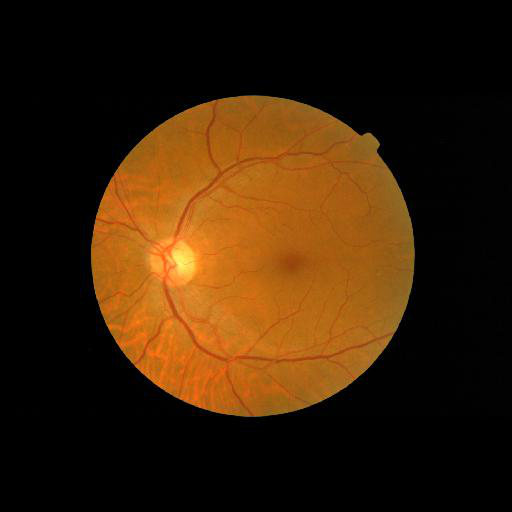

In [144]:
image = Image.open(r'D:\data\Projects\notebooks\RetinaAI\0c0fb8b96715.jpg')
image

In [145]:
w, h = image.size
w,h

(512, 512)

In [146]:
image.format

'JPEG'

In [147]:
image.save('D:/dasaug.jpg')

In [148]:
image.rotate(90).save('D:/dasgedrehteaug.png')

In [149]:
image.transpose(Image.FLIP_LEFT_RIGHT).save('D:\horizontalerflipaug.jpg')

In [150]:
image.transpose(Image.FLIP_TOP_BOTTOM).save('D:\kopfaug.jpg')

### Normalize with Tensorflow Generator

In [151]:
# https://keras.io/api/preprocessing/image/
# https://stackoverflow.com/questions/54702212/keras-rescale-1-255-vs-preprocessing-function-preprocess-input-which-one-to

https://www.geeksforgeeks.org/how-to-normalize-center-and-standardize-image-pixels-in-keras/
https://www.youtube.com/watch?v=_L2uYfVV48I

Normalize Pixel intensity, so that values are not from 0-255 but 0-1. 